In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [9]:

# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [10]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [11]:

train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory=r"D:\java\extracted_images\train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [12]:

val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= r"D:\java\extracted_images\test",
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


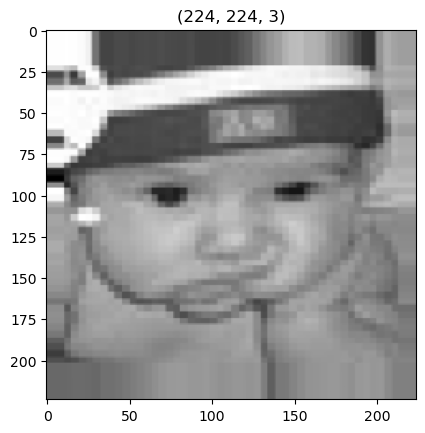

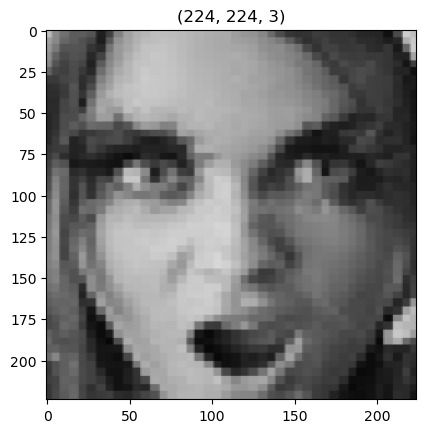

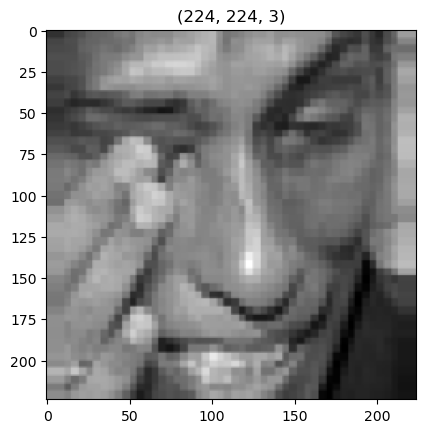

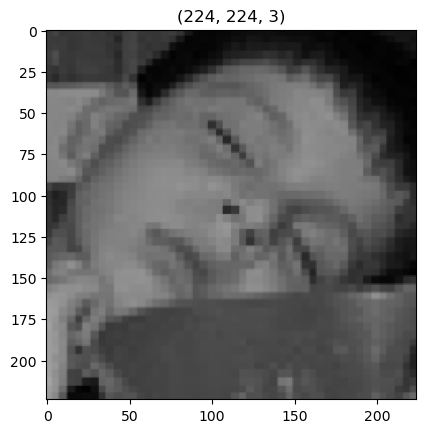

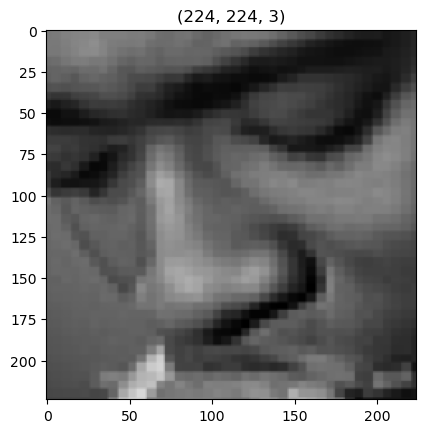

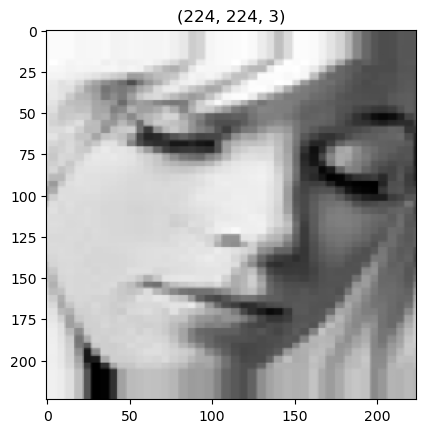

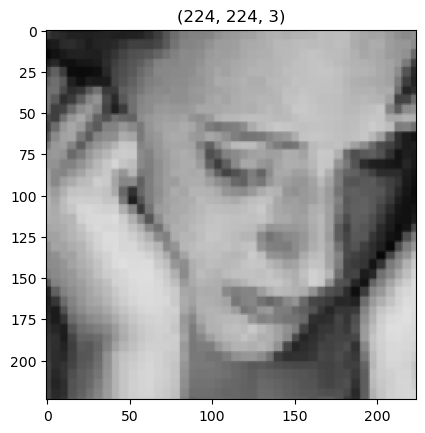

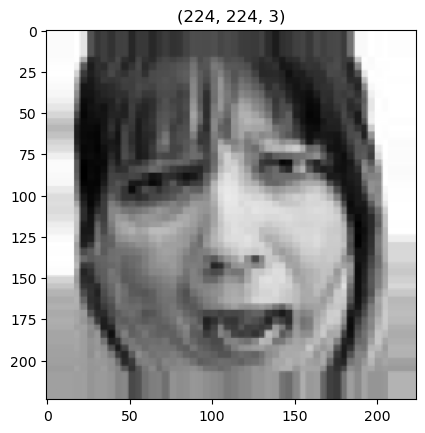

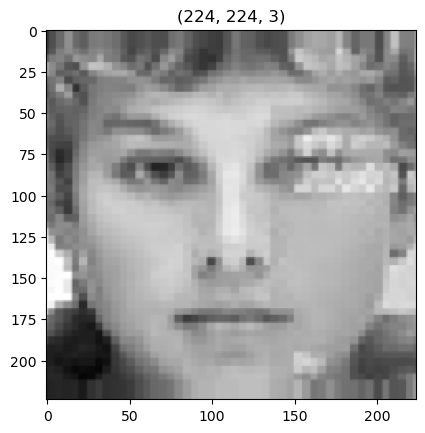

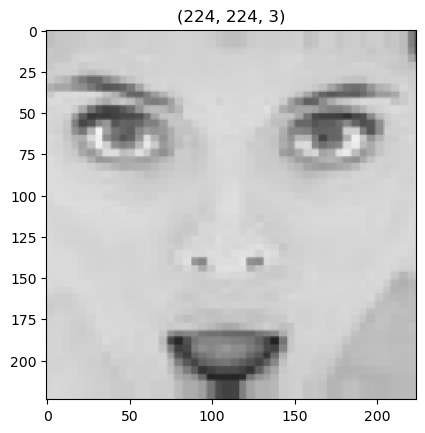

In [13]:



# to visualize the images in the traing data denerator 

t_img, label = next(train_data)


#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [14]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.keras", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [ ]:
hist = model.fit(train_data, 
                 steps_per_epoch=10, 
                 epochs=30, 
                 validation_data=val_data, 
                 validation_steps=8, 
                 callbacks=[es, mc])


D:\java\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 775ms/step - accuracy: 0.1185 - loss: 16.6283
Epoch 1: val_accuracy improved from -inf to 0.26562, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.1188 - loss: 17.0077 - val_accuracy: 0.2656 - val_loss: 13.6286
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 683ms/step - accuracy: 0.2570 - loss: 15.7711
Epoch 2: val_accuracy improved from 0.26562 to 0.31250, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2584 - loss: 15.7890 - val_accuracy: 0.3125 - val_loss: 13.7416
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.3379 - loss: 10.4080
Epoch 3: val_accuracy improved from 0.31250 to 0.42188, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 932ms/step - accuracy: 0.3353 - loss: 10.2459 - val_accuracy: 0.4219 - val_loss: 5.9876
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.3663 - loss: 6.4995
Epoch 4: val_accuracy did not improve

In [ ]:


# Loading the best fit model 
from keras.models import load_model
model = load_model(r"C:\Users\Ganesh\best_model.keras")

In [ ]:

h =  hist.history
h.keys()


In [ ]:

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [ ]:

# path for the image to see if it predics correct class

path = r"D:\java\extracted_images\test\surprise\PrivateTest_104142.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()

In [ ]:
import os
import cv2
import numpy as np
from keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import load_img, img_to_array 
from keras.models import  load_model
import matplotlib.pyplot as plt
import numpy as np

# load model
model = load_model("best_model.keras")


face_haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(0)

while True:
    ret, test_img = cap.read()  # captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

    for (x, y, w, h) in faces_detected:
        cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
        roi_gray = gray_img[y:y + w, x:x + h]  # cropping region of interest i.e. face area from  image
        roi_gray = cv2.resize(roi_gray, (224, 224))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis=0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        # find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]

        cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial emotion analysis ', resized_img)

    if cv2.waitKey(10) == ord('q'):  # wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows

In [ ]:
!pip install opencv-python
!pip install Flask
!pip install pyzoom


In [ ]:
pip install serial


In [ ]:
from zoomus import ZoomClient

# Replace with your API Key and API Secret
client = ZoomClient('gT6dEf7GRRegvZAxIHwzig', 'JSvBL4tIlMcQ7tyo5FCz2mUhyv5A69CM')

# Create a meeting
user = client.user
meeting = user.meetings.create(topic='Online Class', type=2, start_time='2024-12-24T10:00:00Z')

print(meeting)


In [ ]:
pip install zoomus

In [ ]:
pip install requests

In [ ]:
import requests
import base64

# Zoom credentials
client_id = "21NRKgNRQ7iQjeZmJNrRg"  # Replace with your Client ID
client_secret = "8hy4oOdxpbV44aNZx9xUEOV9RvVf6T7"  # Replace with your Client Secret
account_id = "UIEZdUS7TU6y_JA3JQx9fw"  # Replace with your Account ID

# Function to get access token
def get_access_token(client_id, client_secret, account_id):
    url = f"https://zoom.us/oauth/token?grant_type=account_credentials&account_id={account_id}"
    auth_string = f"{client_id}:{client_secret}"
    auth_base64 = base64.b64encode(auth_string.encode()).decode()
    headers = {
        "Authorization": f"Basic {auth_base64}",
        "Content-Type": "application/x-www-form-urlencoded",
    }

    print("Request URL:", url)
    print("Authorization Header:", headers["Authorization"])

    response = requests.post(url, headers=headers)
    print("Response Status Code:", response.status_code)
    print("Response Text:", response.text)

    if response.status_code == 200:
        return response.json()["access_token"]
    else:
        return None

# Call the function to get the access token
access_token = get_access_token(client_id, client_secret, account_id)
if access_token:
    print("Access Token:", access_token)
else:
    print("Failed to generate Access Token.")


In [ ]:
from flask import Flask, request, abort

app = Flask(__name__)

SECRET_TOKEN = "CnVAwnRhQRaPLr1A-iJFTA"  # Replace with your Secret Token

@app.route("/webhook", methods=["POST"])
def zoom_webhook():
    # Get the token from the request headers
    received_token = request.headers.get("Authorization")  # Or use the header where Zoom sends the token
    
    # Validate the token
    if received_token != f"Bearer {SECRET_TOKEN}":
        abort(403)  # Forbidden, invalid token
    
    # Process the webhook payload
    data = request.json
    print("Webhook received:", data)
    return "Webhook processed successfully", 200

if __name__ == "__main__":
    app.run(port=5000)
